### Pricing Options under different vol scenarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from qp import bs_price, bs_greeks 

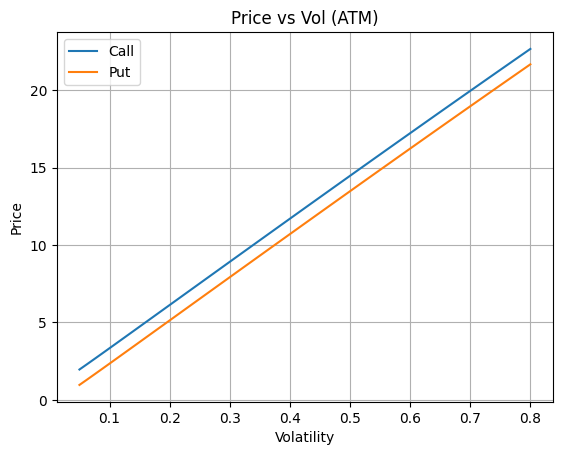

In [14]:
#parameters 
S = 100.0
K = 100.0
r = 0.02
q = 0.00
T = 0.5 
sigmas = np.linspace(0.05, 0.80, 60)

call_prices = [bs_price(S, K, r, q, s, T, "call") for s in sigmas]
put_prices = [bs_price(S, K, r, q, s, T, "put") for s in sigmas]

plt.figure()
plt.plot(sigmas, call_prices, label="Call")
plt.plot(sigmas, put_prices, label="Put")
plt.xlabel("Volatility")
plt.ylabel("Price")
plt.title("Price vs Vol (ATM)")
plt.legend()
plt.grid(True)
plt.show()

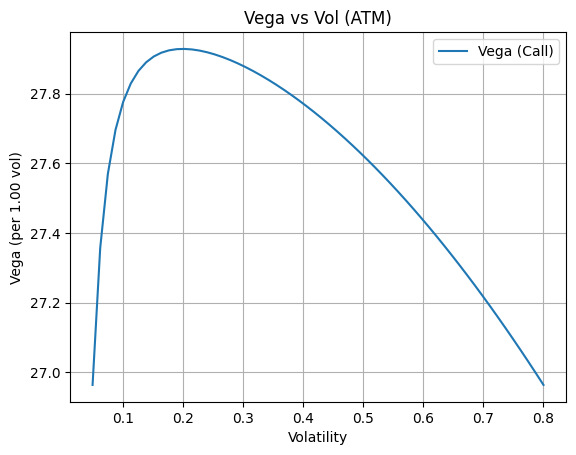

In [15]:
vegas = [bs_greeks(S, K, r, q, s, T, "call")["vega"] for s in sigmas]

plt.figure()
plt.plot(sigmas, vegas, label="Vega (Call)")
plt.xlabel("Volatility")
plt.ylabel("Vega (per 1.00 vol)")
plt.title("Vega vs Vol (ATM)")
plt.legend()
plt.grid(True)
plt.show()


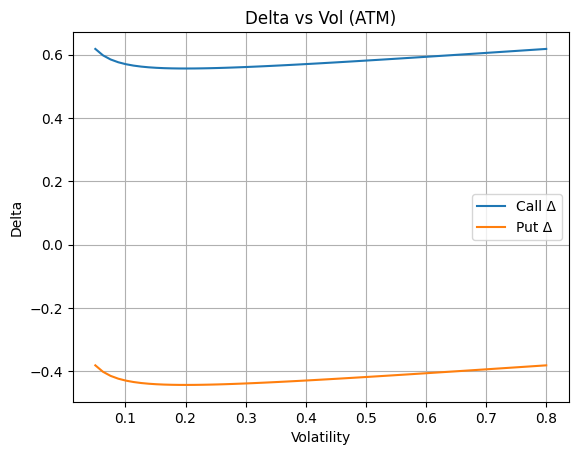

In [16]:
deltas_call = [bs_greeks(S, K, r, q, s, T, "call")["delta"] for s in sigmas]
deltas_put  = [bs_greeks(S, K, r, q, s, T, "put")["delta"]  for s in sigmas]

plt.figure()
plt.plot(sigmas, deltas_call, label="Call Δ")
plt.plot(sigmas, deltas_put,  label="Put Δ")
plt.xlabel("Volatility")
plt.ylabel("Delta")
plt.title("Delta vs Vol (ATM)")
plt.legend()
plt.grid(True)
plt.show()


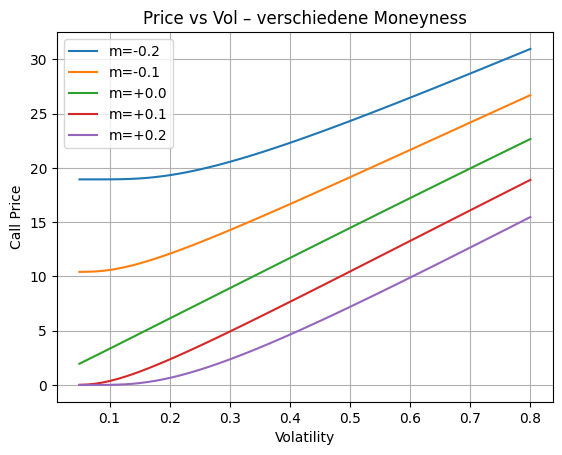

In [13]:
moneyness = [-0.2, -0.1, 0.0, 0.1, 0.2]  # (K = S*exp(m))
curves = {}
for m in moneyness:
    K_m = S * np.exp(m)
    curves[m] = [bs_price(S, K_m, r, q, s, T, "call") for s in sigmas]

plt.figure()
for m, y in curves.items():
    plt.plot(sigmas, y, label=f"m={m:+.1f}")
plt.xlabel("Volatility")
plt.ylabel("Call Price")
plt.title("Price vs Vol – verschiedene Moneyness")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
scenarios = [
    {"label": "Low vol",   "sigma": 0.10},
    {"label": "Base vol",  "sigma": 0.25},
    {"label": "High vol",  "sigma": 0.50},
]
rows = []
for sc in scenarios:
    g = bs_greeks(S, K, r, q, sc["sigma"], T, "call")
    rows.append((sc["label"], sc["sigma"], g["price"], g["delta"], g["gamma"], g["vega"], g["theta"], g["rho"]))
print("label,sigma,price,delta,gamma,vega,theta,rho")
for r_ in rows:
    print(",".join(str(round(x,6)) if isinstance(x,(int,float)) else str(x) for x in r_))


label,sigma,price,delta,gamma,vega,theta,rho
Low vol,0.1,3.331842,0.570158,0.055544,27.772132,-3.850893,26.841984
Base vol,0.25,7.516846,0.557628,0.022332,27.914655,-7.943582,24.122954
High vol,0.5,14.464847,0.581238,0.011049,27.622566,-14.684462,21.829464


In [12]:
sigma0 = 0.25
g0 = bs_greeks(S, K, r, q, sigma0, T, "call")
dv_1pct = g0["vega"] / 100.0  # vega per 1%p
print(f"At sigma={sigma0:.2f}, approx dPrice for +1% vol ≈ {dv_1pct:.4f}")

At sigma=0.25, approx dPrice for +1% vol ≈ 0.2791


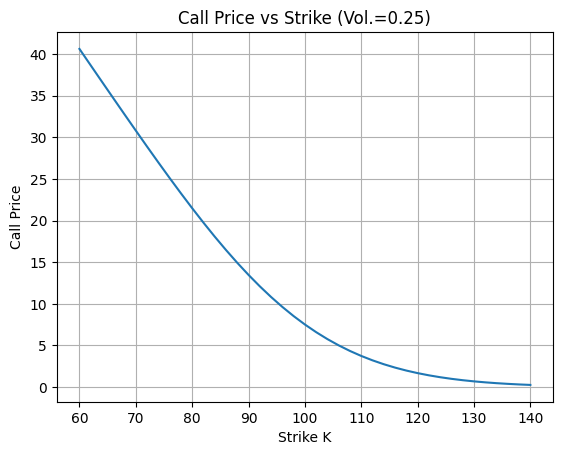

In [11]:
sigma_fix = 0.25
Ks = np.linspace(60, 140, 41)
prices_K = [bs_price(S, Kx, r, q, sigma_fix, T, "call") for Kx in Ks]

plt.figure()
plt.plot(Ks, prices_K)
plt.xlabel("Strike K")
plt.ylabel("Call Price")
plt.title(f"Call Price vs Strike (Vol.={sigma_fix:.2f})")
plt.grid(True)
plt.show()